In [1]:
# interactive figure
%matplotlib widget
# %matplotlib inline

In [2]:
# auto reload modules
%load_ext autoreload
%autoreload 2

import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec
from sys import platform
from IPython.display import HTML, display
from matplotlib.colors import LinearSegmentedColormap
from viztool import FormatScalarFormatter

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

def fxn():
    warnings.warn('deprecated', DeprecationWarning)

In [3]:
if platform == 'linux' or platform == 'linux2':
    data_root = '/glade/work/zhihuaz/Data/FrontalZone/'
elif platform == 'darwin':
    data_root = '/Users/zhihua/Documents/Work/Research/Projects/TRACE-SEAS/FrontalZone/Data/'
else:
    print('OS not supported.')

In [6]:
case = 'f11_Q000_W000_D000_St0'#'spinup'
ds = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds.close()

case = 'f11_Q000_W022_D000_St0'
ds_windE = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windE.close()

case = 'f11_Q000_W022_D045_St0'
ds_windNE = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windNE.close()

case = 'f11_Q000_W022_D090_St0'
ds_windN = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windN.close()

case = 'f11_Q000_W022_D135_St0'
ds_windNW = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windNW.close()

case = 'f11_Q000_W022_D180_St0'
ds_windW = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windW.close()

case = 'f11_Q000_W022_D225_St0'
ds_windSW = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windSW.close()

case = 'f11_Q000_W022_D270_St0'
ds_windS = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windS.close()

case = 'f11_Q000_W022_D315_St0'
ds_windSE = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windSE.close()

case = 'f11_Q000_W022_O090_St0'
ds_windO = xr.open_dataset(data_root+case+'.nc', group='average').load()
ds_windO.close()

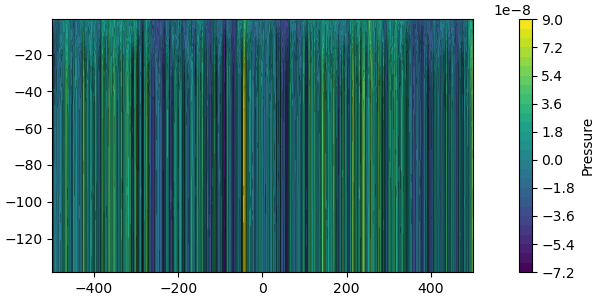

In [32]:
plt.close()
fig = plt.figure(figsize=(6,3), constrained_layout=True)

cP = plt.contourf(ds.xC, ds.zC, ds.pNHS.isel(time=10), 30)
plt.contour(ds.xC, ds.zC, ds.pNHS.isel(time=10), 30, colors='k', linewidths=0.1, linestyles='solid')

cbar = fig.colorbar(cP, ax=plt.gca(), fraction=0.5)
cbar.set_label(r"Pressure");

### Volume averaged Ertel PV

In [24]:
idx_zb = list(ds.zF).index(ds.zF.sel(zF=-120, method='backfill'))
# PV0 = -ds.attrs['M²']**2/ds.f + ds.f*ds['B'].mean('xC').isel(time=0).isel(zC=[0,-1]).diff('zC')/(ds.zC[-1] - ds.zC[0])

6

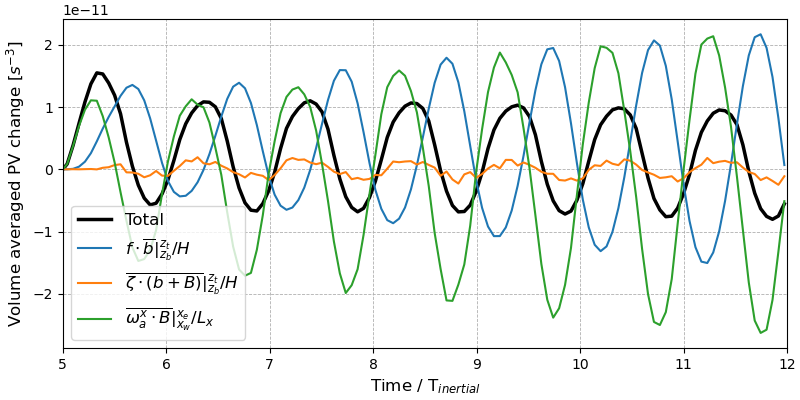

In [18]:
plt.close()
plt.figure(figsize=(8,4), constrained_layout=True)

plt.plot(ds_windO.timeTf, ds_windO.PVvm-ds_windO.PVvm[0], 'k', lw=2.5)
plt.plot(ds_windO.timeTf, ds_windO.PVvm_f-ds_windO.PVvm_f[0])
plt.plot(ds_windO.timeTf, ds_windO.PVvm_z-ds_windO.PVvm_z[0])
plt.plot(ds_windO.timeTf, ds_windO.PVvm_x-ds_windO.PVvm_x[0])
plt.grid('on', ls='--', lw=0.6)
plt.xlim(5,12)
plt.legend(['Total', r'$f \cdot \overline{b} |^{z_t}_{z_b}/H$', 
            r'$\overline{\zeta \cdot (b+B)} |^{z_t}_{z_b}/H$', 
            r'$\overline{\omega_a^{x} \cdot B} |^{x_e}_{x_w}/L_x$'], fontsize=12)

plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);
plt.ylabel(r'Volume averaged PV change [$s^{-3}$]', fontsize=12);
# plt.savefig('../Figures/f11_Q000_W000_D000_St0_PVvm_3comps.png', dpi=200)

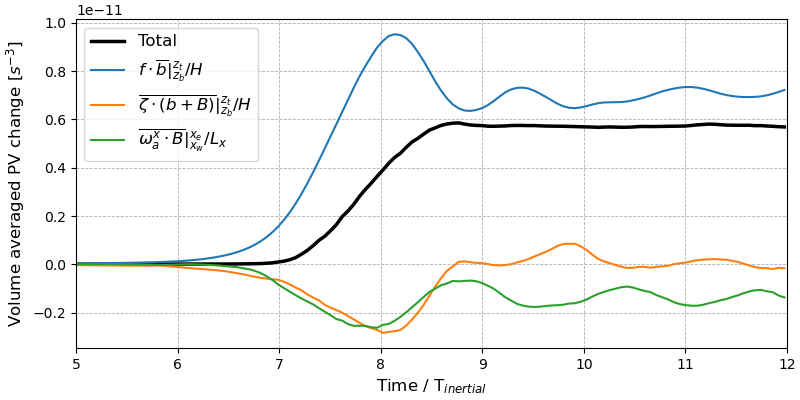

In [19]:
plt.close()
plt.figure(figsize=(8,4), constrained_layout=True)

plt.plot(ds.timeTf, ds.PVvm-ds.PVvm[0], 'k', lw=2.5)
plt.plot(ds.timeTf, ds.PVvm_f-ds.PVvm_f[0])
plt.plot(ds.timeTf, ds.PVvm_z-ds.PVvm_z[0])
plt.plot(ds.timeTf, ds.PVvm_x-ds.PVvm_x[0])

plt.grid('on', ls='--', lw=0.6)
plt.xlim(5,12)
plt.legend(['Total', r'$f \cdot \overline{b} |^{z_t}_{z_b}/H$', 
            r'$\overline{\zeta \cdot (b+B)} |^{z_t}_{z_b}/H$', 
            r'$\overline{\omega_a^{x} \cdot B} |^{x_e}_{x_w}/L_x$'], fontsize=12)

plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);
plt.ylabel(r'Volume averaged PV change [$s^{-3}$]', fontsize=12);
# plt.savefig('../Figures/f11_Q000_W000_D000_St0_PVvm_3comps.png', dpi=200)

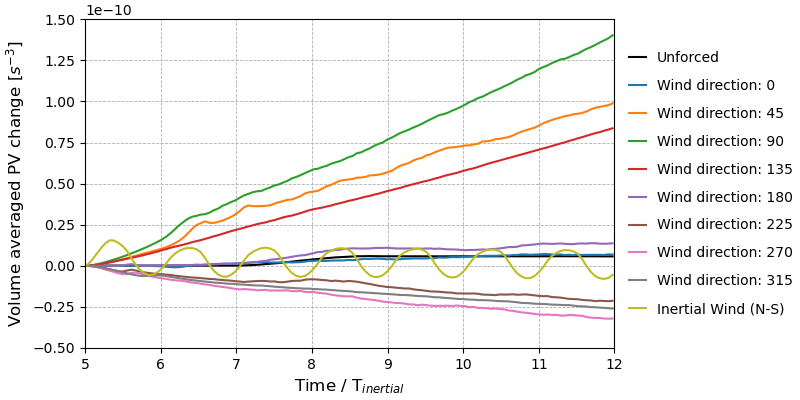

In [6]:
plt.close()
plt.figure(figsize=(8,4), constrained_layout=True)

plt.plot(ds.timeTf, ds.PVvm-ds.PVvm[0], 'k')
plt.plot(ds_windE.timeTf, ds_windE.PVvm-ds_windE.PVvm[0])
plt.plot(ds_windNE.timeTf, ds_windNE.PVvm-ds_windNE.PVvm[0])
plt.plot(ds_windN.timeTf, ds_windN.PVvm-ds_windN.PVvm[0])
plt.plot(ds_windNW.timeTf, ds_windNW.PVvm-ds_windNW.PVvm[0])
plt.plot(ds_windW.timeTf, ds_windW.PVvm-ds_windW.PVvm[0])
plt.plot(ds_windSW.timeTf, ds_windSW.PVvm-ds_windSW.PVvm[0])
plt.plot(ds_windS.timeTf, ds_windS.PVvm-ds_windS.PVvm[0])
plt.plot(ds_windSE.timeTf, ds_windSE.PVvm-ds_windSE.PVvm[0])
plt.plot(ds_windO.timeTf, ds_windO.PVvm-ds_windO.PVvm[0])

# plt.plot(dss.timeTf, dss.PVvm-dss.PVvm[0], '--k')
# plt.plot(ds_windE.timeTf, ds_windE.PVvm-ds_windE.PVvm[0], '--')
# plt.plot(ds_windNE.timeTf, ds_windNE.PVvm-ds_windNE.PVvm[0], '--')
# plt.plot(ds_windN.timeTf, ds_windN.PVvm-ds_windN.PVvm[0], '--')
# plt.plot(ds_windNW.timeTf, ds_windNW.PVvm-ds_windNW.PVvm[0], '--')
# plt.plot(ds_windW.timeTf, ds_windW.PVvm-ds_windW.PVvm[0], '--')
# plt.plot(ds_windSW.timeTf, ds_windSW.PVvm-ds_windSW.PVvm[0], '--')
# plt.plot(ds_windS.timeTf, ds_windS.PVvm-ds_windS.PVvm[0], '--')
# plt.plot(ds_windSE.timeTf, ds_windSE.PVvm-ds_windSE.PVvm[0], '--')

# plt.axhline(PV0, ls='--', c='k')
# plt.yscale('log')
plt.grid('on', ls='--', lw=0.6)
plt.xlim(5,12);
plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);
plt.ylabel(r'Volume averaged PV change [$s^{-3}$]', fontsize=12);

# plt.legend(['Unforced', 'Wind direction: 0', 'Wind direction: 180'], fontsize=12);
# plt.savefig('../Figures/sPVvm_EWwind.png', dpi=200);

plt.ylim(-0.5e-10, 1.5e-10)
plt.legend(['Unforced', 'Wind direction: 0', 'Wind direction: 45', 
            'Wind direction: 90', 'Wind direction: 135',
            'Wind direction: 180', 'Wind direction: 225', 
            'Wind direction: 270', 'Wind direction: 315', 'Inertial Wind (N-S)'],
            bbox_to_anchor=(1.36, 0.5), loc='center right', 
           handlelength=1.2, frameon=False, labelspacing=1);
plt.savefig('../Figures/fPVvm_allwind_NIO.png', bbox_inches='tight', dpi=200);

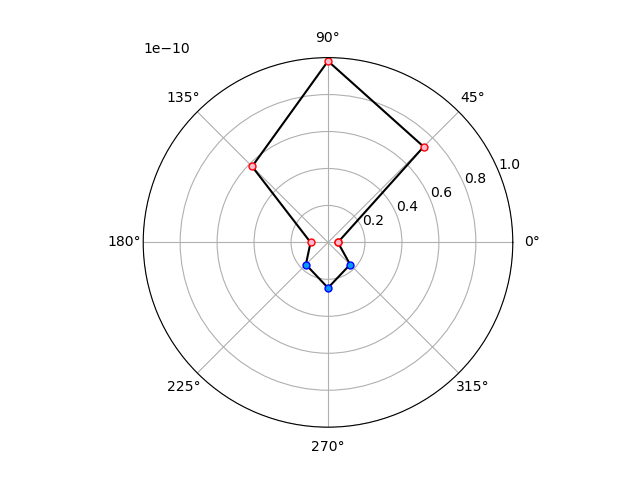

In [36]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

idx = np.abs(ds_windE.timeTf-10).argmin('time')
r = np.hstack([(ds_windE.PVvm[idx]  - ds_windE.PVvm[0]).data,
     (ds_windNE.PVvm[idx] - ds_windNE.PVvm[0]).data,
     (ds_windN.PVvm[idx]  - ds_windN.PVvm[0]).data,
     (ds_windNW.PVvm[idx] - ds_windNW.PVvm[0]).data,
     (ds_windW.PVvm[idx]  - ds_windW.PVvm[0]).data,
     (ds_windSW.PVvm[idx] - ds_windSW.PVvm[0]).data,
     (ds_windS.PVvm[idx]  - ds_windS.PVvm[0]).data,
     (ds_windSW.PVvm[idx] - ds_windSW.PVvm[0]).data,
     (ds_windE.PVvm[idx]  - ds_windE.PVvm[0]).data,
    ])

ax.plot(np.arange(0,405,45)/180*np.pi, np.abs(r), '-', color='k')
ax.scatter(np.arange(0,405,45)[r>0]/180*np.pi, np.abs(r[r>0]), 25, edgecolors='r', facecolor='xkcd:pastel pink', lw=1, zorder=2, clip_on=False)
ax.scatter(np.arange(0,405,45)[r<0]/180*np.pi, np.abs(r[r<0]), 25, edgecolors='b', facecolor='xkcd:azure', lw=1, zorder=2)
ax.set_ylim(0, 1e-10);
plt.savefig('../Figures/fPVvm_allwind_polar.png', bbox_inches='tight', dpi=200);

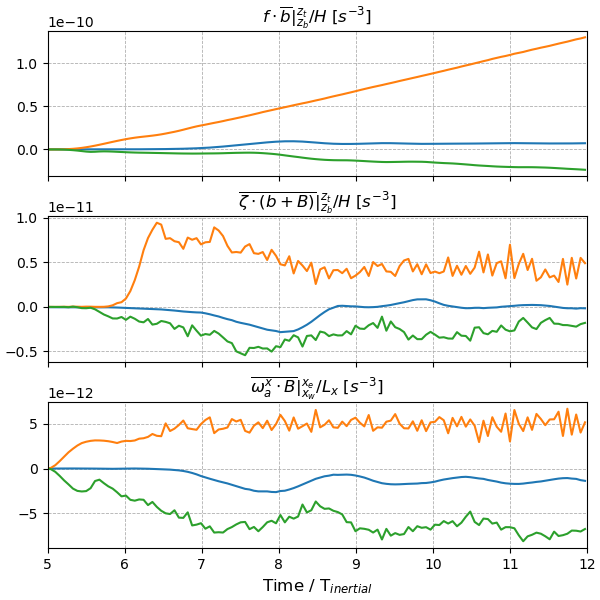

In [39]:
plt.close()
_,ax = plt.subplots(3,1, figsize=(6,6), constrained_layout=True, sharex=True)

ax[0].plot(ds.timeTf, ds.PVvm_f-ds.PVvm_f[0])
ax[0].plot(ds_windN.timeTf, ds_windN.PVvm_f-ds_windN.PVvm_f[0])
ax[0].plot(ds_windS.timeTf, ds_windS.PVvm_f-ds_windS.PVvm_f[0])
ax[0].grid('on', ls='--', lw=0.6)
ax[0].set_title(r'$f \cdot \overline{b} |^{z_t}_{z_b}/H$ [$s^{-3}$]');

ax[1].plot(ds.timeTf, ds.PVvm_z-ds.PVvm_z[0])
ax[1].plot(ds_windN.timeTf, ds_windN.PVvm_z-ds_windN.PVvm_z[0])
ax[1].plot(ds_windS.timeTf, ds_windS.PVvm_z-ds_windS.PVvm_z[0])
ax[1].grid('on', ls='--', lw=0.6)
ax[1].set_title(r'$\overline{\zeta \cdot (b+B)} |^{z_t}_{z_b}/H$ [$s^{-3}$]')

ax[2].plot(ds.timeTf, ds.PVvm_x-ds.PVvm_x[0])
ax[2].plot(ds_windN.timeTf, ds_windN.PVvm_x-ds_windN.PVvm_x[0])
ax[2].plot(ds_windS.timeTf, ds_windS.PVvm_x-ds_windS.PVvm_x[0])
ax[2].grid('on', ls='--', lw=0.6)
plt.xlim(5,12)
plt.xlabel(r'Time / T$_{inertial}$', fontsize=12);
ax[2].set_title(r'$\overline{\omega_a^{x} \cdot B} |^{x_e}_{x_w}/L_x$ [$s^{-3}$]');

plt.savefig('../Figures/fPVvm_NSwind_3comps.png', dpi=200)

### Bulk $N^2$ budget

Text(0, 0.5, 'Z [m]')

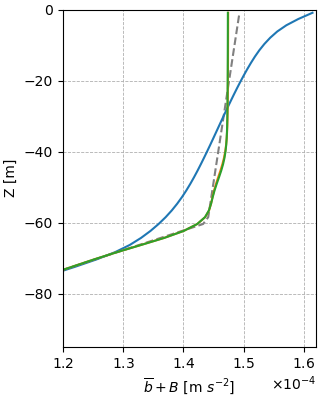

In [112]:
plt.close()
plt.figure(figsize=(3.2,4), constrained_layout=True)

plt.plot(ds.B.mean('xC').isel(time=0), ds.zC, '--', c='gray')
plt.plot(ds.B.mean('xC').where((ds.timeTf >= 7.5) & (ds.timeTf < 8.5)).mean('time'), ds.zC)
plt.plot(ds_windE.B.mean('xC').where((ds_windE.timeTf >= 7.5) & (ds_windE.timeTf < 8.5)).mean('time'), ds_windE.zC)
plt.plot(ds_windW.B.mean('xC').where((ds_windW.timeTf >= 7.5) & (ds_windW.timeTf < 8.5)).mean('time'), ds_windW.zC)
plt.xlim(1.2e-4, 1.62e-4)
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

plt.ylim(-95,0)
plt.grid('on', ls='--', lw=0.6)
plt.xlabel(r'$\overline{b} + B$ [m $s^{-2}]$')
plt.ylabel('Z [m]')
# plt.savefig('../Figures/bt_hm.png', dpi=200);

Text(0, 0.5, 'Z [m]')

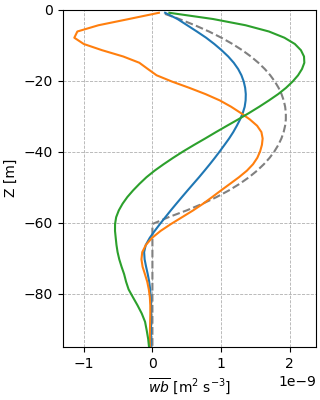

In [70]:
plt.close()
plt.figure(figsize=(3.2,4), constrained_layout=True)

Ce = 0.06
H = 60
mu = np.maximum((1-(2*ds.zC/H + 1)**2)*(1+5/21*(2*ds.zC/H + 1)**2), np.zeros_like(ds.zC))
plt.plot(Ce*H**2*ds.attrs['M²']**2*mu/ds.f, ds.zC, '--', c='gray')
plt.plot(ds.wbym.mean('xC').where((ds.timeTf >= 7.5) & (ds.timeTf < 8.5)).mean('time'), ds.zC)
plt.plot(ds_windE.wbym.mean('xC').where((ds_windE.timeTf >= 7.5) & (ds_windE.timeTf < 8.5)).mean('time'), ds_windE.zC)
plt.plot(ds_windW.wbym.mean('xC').where((ds_windW.timeTf >= 7.5) & (ds_windW.timeTf < 8.5)).mean('time'), ds_windW.zC)

plt.ylim(-95,0)
plt.grid('on', ls='--', lw=0.6)
plt.xlabel(r'$\overline{wb}$ [m$^2$ s$^{-3}]$')
plt.ylabel('Z [m]')
# plt.savefig('../Figures/wb_hm.png', dpi=200);

Text(0, 0.5, 'Z [m]')

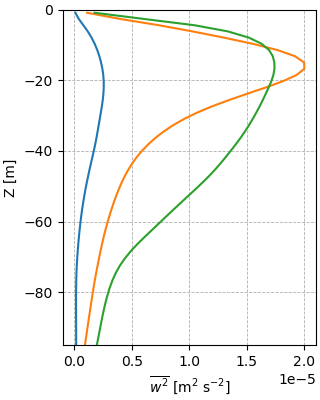

In [74]:
plt.close()
plt.figure(figsize=(3.2,4), constrained_layout=True)
plt.plot(ds.w2ym.mean('xC').where((ds.timeTf >= 7.5) & (ds.timeTf < 8.5)).mean('time'), ds.zC)
plt.plot(ds_windE.w2ym.mean('xC').where((ds_windE.timeTf >= 7.5) & (ds_windE.timeTf < 8.5)).mean('time'), ds_windE.zC)
plt.plot(ds_windW.w2ym.mean('xC').where((ds_windW.timeTf >= 7.5) & (ds_windW.timeTf < 8.5)).mean('time'), ds_windW.zC)

# plt.plot(ds.w3ym.mean('xC').where((ds.timeTf >= 7.5) & (ds.timeTf < 8.5)).mean('time'), ds.zC)
# plt.plot(ds_windE.w3ym.mean('xC').where((ds_windE.timeTf >= 7.5) & (ds_windE.timeTf < 8.5)).mean('time'), ds_windE.zC)
# plt.plot(ds_windW.w3ym.mean('xC').where((ds_windW.timeTf >= 7.5) & (ds_windW.timeTf < 8.5)).mean('time'), ds_windW.zC)

plt.ylim(-95,0)
plt.grid('on', ls='--', lw=0.6)
plt.xlabel(r'$\overline{w^2}$ [m$^2$ s$^{-2}]$')
# plt.xlabel(r'$\overline{w^3}$ $[m^3 s^{-3}]$')
plt.ylabel('Z [m]')
# plt.savefig('../Figures/w2_hm.png', dpi=200);

Text(0, 0.5, 'Z [m]')

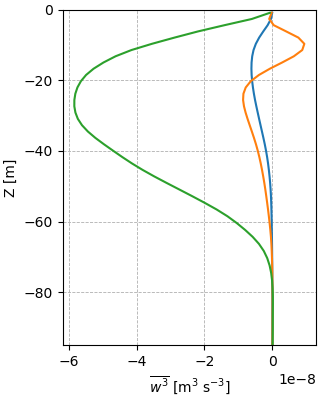

In [75]:
plt.close()
plt.figure(figsize=(3.2,4), constrained_layout=True)
plt.plot(ds.w3ym.mean('xC').where((ds.timeTf >= 7.5) & (ds.timeTf < 8.5)).mean('time'), ds.zC)
plt.plot(ds_windE.w3ym.mean('xC').where((ds_windE.timeTf >= 7.5) & (ds_windE.timeTf < 8.5)).mean('time'), ds_windE.zC)
plt.plot(ds_windW.w3ym.mean('xC').where((ds_windW.timeTf >= 7.5) & (ds_windW.timeTf < 8.5)).mean('time'), ds_windW.zC)

plt.ylim(-95,0)
plt.grid('on', ls='--', lw=0.6)
plt.xlabel(r'$\overline{w^3}$ [m$^3$ s$^{-3}]$')
plt.ylabel('Z [m]')
# plt.savefig('../Figures/w3_hm.png', dpi=200);

In [77]:
zt = -1
zb = -60
H = ds.zC.sel(zC=zt, method='nearest') - ds.zC.sel(zC=zb, method='nearest')

ds['dN2dt']     = (ds['∂ₜB'].sel(zC=zt, method='nearest')-ds['∂ₜB'].sel(zC=zb, method='nearest'))/H
ds['dN2dt_adb'] = (ds.Badb.sel(zC=zt, method='nearest')-ds.Badb.sel(zC=zb, method='nearest'))/H
ds['dN2dt_adv'] = (ds.Badv.sel(zC=zt, method='nearest')-ds.Badv.sel(zC=zb, method='nearest'))/H
ds['dN2dt_dia'] = (ds.Bdia.sel(zC=zt, method='nearest')-ds.Bdia.sel(zC=zb, method='nearest'))/H

ds_windE['dN2dt']     = (ds_windE['∂ₜB'].sel(zC=zt, method='nearest')-ds_windE['∂ₜB'].sel(zC=zb, method='nearest'))/H
ds_windE['dN2dt_adb'] = (ds_windE.Badb.sel(zC=zt, method='nearest')-ds_windE.Badb.sel(zC=zb, method='nearest'))/H
ds_windE['dN2dt_adv'] = (ds_windE.Badv.sel(zC=zt, method='nearest')-ds_windE.Badv.sel(zC=zb, method='nearest'))/H
ds_windE['dN2dt_dia'] = (ds_windE.Bdia.sel(zC=zt, method='nearest')-ds_windE.Bdia.sel(zC=zb, method='nearest'))/H

ds_windW['dN2dt']     = (ds_windW['∂ₜB'].sel(zC=zt, method='nearest')-ds_windW['∂ₜB'].sel(zC=zb, method='nearest'))/H
ds_windW['dN2dt_adb'] = (ds_windW.Badb.sel(zC=zt, method='nearest')-ds_windW.Badb.sel(zC=zb, method='nearest'))/H
ds_windW['dN2dt_adv'] = (ds_windW.Badv.sel(zC=zt, method='nearest')-ds_windW.Badv.sel(zC=zb, method='nearest'))/H
ds_windW['dN2dt_dia'] = (ds_windW.Bdia.sel(zC=zt, method='nearest')-ds_windW.Bdia.sel(zC=zb, method='nearest'))/H

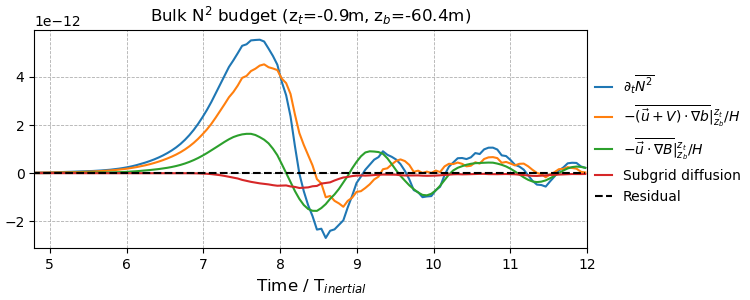

In [146]:
plt.close()
plt.figure(figsize=(7.5,3), constrained_layout=True)

plt.plot(ds.timeTf, ds.dN2dt)
plt.plot(ds.timeTf, ds.dN2dt_adv)
plt.plot(ds.timeTf, ds.dN2dt_adb)
plt.plot(ds.timeTf, ds.dN2dt_dia)
plt.plot(ds.timeTf, ds.dN2dt-ds.dN2dt_adv-ds.dN2dt_adb-ds.dN2dt_dia,
         '--k')
plt.grid('on', ls='--', lw=0.6)
plt.xlim(4.8,12);
plt.xlabel('Time / T$_{inertial}$', fontsize=12);
plt.legend([r'$\partial_t \overline{N^2}$', r'$-\overline{(\vec{u}+V) \cdot\nabla b} |^{z_t}_{z_b}/H$', 
            r'$-\overline{\vec{u} \cdot\nabla B} |^{z_t}_{z_b}/H$', 'Subgrid diffusion', 'Residual'], 
            bbox_to_anchor=(1.3, 0.5), loc='center right', handlelength=1.2, frameon=False)
plt.title(rf'Bulk N$^2$ budget (z$_t$={ds.zC.sel(zC=zt, method='nearest').data:.1f}m, ' + 
          rf'z$_b$={ds.zC.sel(zC=zb, method='nearest').data:.1f}m)');
plt.savefig('../Figures/spinup_bulkN2.png', dpi=200);

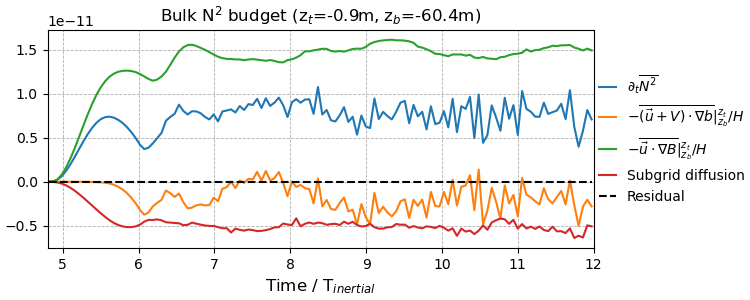

In [78]:
plt.close()
plt.figure(figsize=(7.5,3), constrained_layout=True)

plt.plot(ds_windE.timeTf, ds_windE.dN2dt)
plt.plot(ds_windE.timeTf, ds_windE.dN2dt_adv)
plt.plot(ds_windE.timeTf, ds_windE.dN2dt_adb)
plt.plot(ds_windE.timeTf, ds_windE.dN2dt_dia)
plt.plot(ds_windE.timeTf, ds_windE.dN2dt-ds_windE.dN2dt_adv-ds_windE.dN2dt_adb-ds_windE.dN2dt_dia,
         '--k')
plt.grid('on', ls='--', lw=0.6)
plt.xlim(4.8,12);
plt.xlabel('Time / T$_{inertial}$', fontsize=12);
plt.legend([r'$\partial_t \overline{N^2}$', r'$-\overline{(\vec{u}+V) \cdot\nabla b} |^{z_t}_{z_b}/H$', 
            r'$-\overline{\vec{u} \cdot\nabla B} |^{z_t}_{z_b}/H$', 'Subgrid diffusion', 'Residual'], 
            bbox_to_anchor=(1.3, 0.5), loc='center right', handlelength=1.2, frameon=False)
plt.title(rf'Bulk N$^2$ budget (z$_t$={ds.zC.sel(zC=zt, method='nearest').data:.1f}m, ' + 
          rf'z$_b$={ds.zC.sel(zC=zb, method='nearest').data:.1f}m)');
# plt.savefig('../Figures/f11-Q000-W022-D000-St0_bulkN2.png', dpi=150)

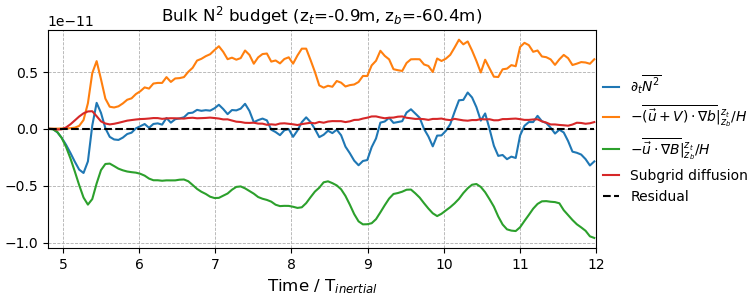

In [79]:
plt.close()
plt.figure(figsize=(7.5,3), constrained_layout=True)

plt.plot(ds_windW.timeTf, ds_windW.dN2dt)
plt.plot(ds_windW.timeTf, ds_windW.dN2dt_adv)
plt.plot(ds_windW.timeTf, ds_windW.dN2dt_adb)
plt.plot(ds_windW.timeTf, ds_windW.dN2dt_dia)
plt.plot(ds_windW.timeTf, ds_windW.dN2dt-ds_windW.dN2dt_adv-ds_windW.dN2dt_adb-ds_windW.dN2dt_dia,
         '--k')
plt.grid('on', ls='--', lw=0.6)
plt.xlim(4.8,12);
plt.xlabel('Time / T$_{inertial}$', fontsize=12);
plt.legend([r'$\partial_t \overline{N^2}$', r'$-\overline{(\vec{u}+V) \cdot\nabla b} |^{z_t}_{z_b}/H$', 
            r'$-\overline{\vec{u} \cdot\nabla B} |^{z_t}_{z_b}/H$', 'Subgrid diffusion', 'Residual'], 
            bbox_to_anchor=(1.3, 0.5), loc='center right', handlelength=1.2, frameon=False)
plt.title(rf'Bulk N$^2$ budget (z$_t$={ds.zC.sel(zC=zt, method='nearest').data:.1f}m, ' + 
          rf'z$_b$={ds.zC.sel(zC=zb, method='nearest').data:.1f}m)');
# plt.savefig('../Figures/f11-Q000-W022-D180-St0_bulkN2.png', dpi=200)

### Mean KE, mean stratification, mean vertical buoyancy flux

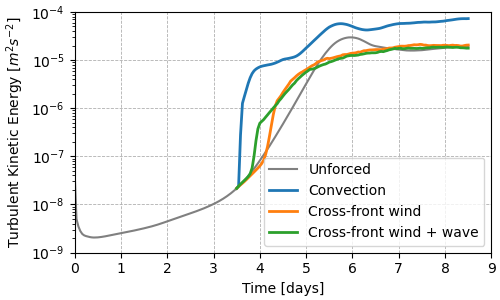

In [51]:
plt.close()
plt.figure(figsize=(5,3), constrained_layout=True)

plt.plot(ds.time/np.timedelta64(1,'D'), ds.KE, color='gray', lw=1.5)
plt.plot(ds_conv.time/np.timedelta64(1,'D'), ds_conv.KE, lw=2)
plt.plot(ds_windE.time/np.timedelta64(1,'D'), ds_windE.KE, lw=2)
plt.plot(ds_wave.time/np.timedelta64(1,'D'), ds_wave.KE, lw=2)
plt.grid('on', ls='--', lw=0.6)
plt.legend(['Unforced', 'Convection', 'Cross-front wind',  'Cross-front wind + wave'])
plt.ylabel(r'Turbulent Kinetic Energy [$m^2 s^{-2}$]')
plt.xlabel('Time [days]');
plt.yscale('log')
plt.xlim(0,9);
plt.ylim(1e-9, 1e-4);
plt.savefig('../Figures/all_KE.png', dpi=200)

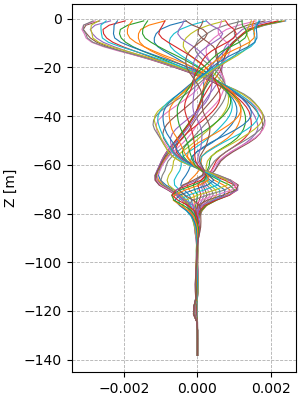

In [133]:
plt.close()
plt.figure(figsize=(3,4), constrained_layout=True)

# plt.plot(ds['B'].sel(time='7.5 days').mean('xC'), ds.zC, '--k')
plt.plot(ds['U'].sel(time=slice('5.5 days','6 days')).mean('xF').T, ds.zC, lw=0.8)

# plt.xscale('symlog')
plt.grid('on', ls='--', lw=0.6)
# plt.ylim(-140,0)
plt.ylabel('Z [m]');

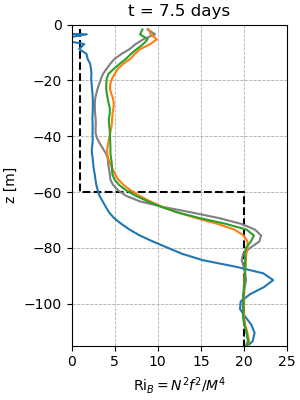

In [78]:
plt.close()
plt.figure(figsize=(3,4), constrained_layout=True)

plt.plot([1,1,20,20], [ds.zF[-2],-60,-60,-140], '--k')
plt.plot(ds.RiB.sel(time='7.5 days', method='nearest')[:-1], ds.zF[:-1], color='gray');
plt.plot(ds_conv.RiB.sel(time='7.5 days', method='nearest')[:-1], ds_conv.zF[:-1]);
plt.plot(ds_windE.RiB.sel(time='7.5 days', method='nearest')[:-1], ds_windE.zF[:-1]);
plt.plot(ds_wave.RiB.sel(time='7.5 days', method='nearest')[:-1], ds_wave.zF[:-1]);

plt.grid('on', ls='--', lw=0.6)
plt.xlim(0,25)
plt.ylim(-115,0)
plt.title('t = 7.5 days')
plt.xlabel(r'Ri$_B = N^2f^2/M^4$')
plt.ylabel('z [m]');
plt.savefig('../Figures/all_RiBprof.png', dpi=200)

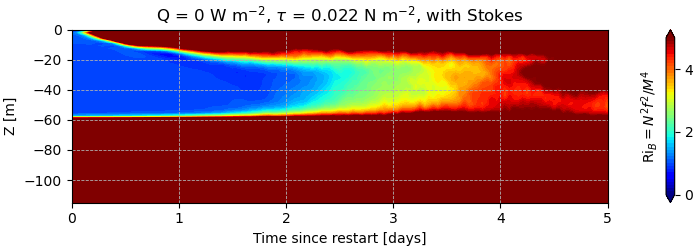

In [77]:
plt.close()
fig = plt.figure(figsize=(7,2.5), constrained_layout=True)

CRiB = plt.contourf((ds.time-np.timedelta64(3*24+12,'h'))/np.timedelta64(1,'D'), 
                     ds.zF, 
                     ds.RiB.transpose('zF','time'), 
                     np.linspace(0,5,50), extend='both', cmap='jet')

cbar = fig.colorbar(CRiB, ax=plt.gca(), fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.0f'))
cbar.set_label(r'Ri$_B = N^2f^2/M^4$', labelpad=-40)
cbar.ax.set_yticks([0,2,4])

plt.grid('on', ls='--', lw=0.6)
plt.xlim(0,5)
plt.ylim(-115,0)
plt.xlabel('Time since restart [days]');
plt.ylabel('Z [m]');
plt.title(r'Q = 0 W m$^{-2}$, $\tau$ = 0.022 N m$^{-2}$, with Stokes')
case = 'r11-Q000-W022-D00-St1'
plt.savefig('../Figures/'+case+'_RiB_TZ.png', dpi=200);

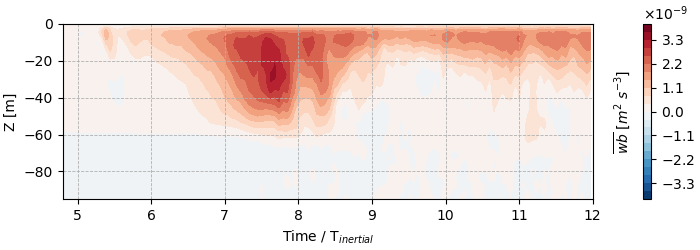

In [105]:
plt.close()
fig = plt.figure(figsize=(7,2.5), constrained_layout=True)

# Cwb = plt.contourf((mfd_uf.time-np.timedelta64(3*24+12,'h'))/np.timedelta64(1,'D'), mfd_uf.zC, 
#                      mfd_uf.wb.mean('xC').transpose('zC','time'), 32, 
#                      norm=mcolors.CenteredNorm(), cmap='RdBu_r')
# Cwb = plt.contourf((mfd_wind.time-np.timedelta64(3*24+12,'h'))/np.timedelta64(1,'D'), mfd_wind.zC, 
#                      mfd_wind.wb.mean('xC').transpose('zC','time'), 32, 
#                      norm=mcolors.CenteredNorm(), cmap='RdBu_r')

wbmax = np.ceil(np.maximum(abs(ds_windW.wbym.mean('xC').min()), abs(ds_windW.wbym.mean('xC').max()))*1e9)/1e9 
Cwb = plt.contourf(ds_windW.timeTf, ds_windW.zC, ds_windW.wbym.mean('xC').transpose('zC','time'), 
                   np.linspace(-wbmax, wbmax, 23), norm=mcolors.CenteredNorm(), cmap='RdBu_r')

cbar = fig.colorbar(Cwb, ax=plt.gca(), fraction=0.5, pad=0.02, format=FormatScalarFormatter('%.1f'))
cbar.set_label(r"$\overline{wb}$ [$m^2$ $s^{-3}$]", labelpad=-60)
cbar.ax.yaxis.set_offset_position('left')

plt.grid('on', ls='--', lw=0.6)
plt.xlim(4.8,12)
plt.ylim(-95,0)
plt.xlabel('Time / T$_{inertial}$');
plt.ylabel('Z [m]');

plt.savefig('../Figures/f11-Q000-W022-D180-St0_wbhm_time.png', dpi=200)

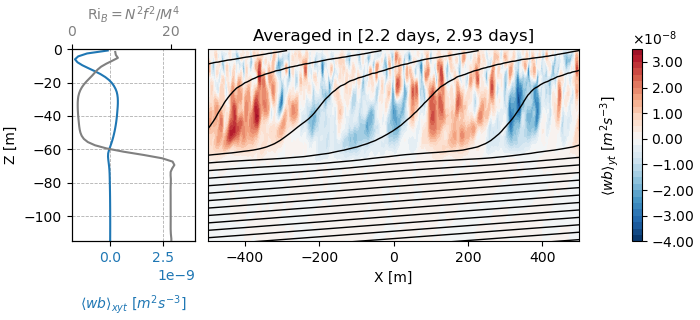

In [85]:
plt.close()
fig = plt.figure(figsize=(7,3.2), constrained_layout=True)
gs = gridspec.GridSpec(1, 4, figure=fig)

# itime = slice('5 days', '5.73 days')
itime = slice('5.2 days', '5.93 days')
ax0 = fig.add_subplot(gs[0, :1])
color = 'C0'
# ax0.plot(mfd_uf.wb.sel(time=itime).mean(['time','xC']), mfd_uf.zC, color=color);
ax0.plot(ds_windE.wb.sel(time=itime).mean(['time','xC']), ds_windE.zC, color=color);
# ax0.plot(mfd_conv.wb.sel(time=itime).mean(['time','xC']), mfd_conv.zC, color=color);
ax0.grid('on', ls='--', lw=0.6)
ax0.set_xlim(-1.8e-9,4e-9)
ax0.set_ylabel('Z [m]');
ax0.set_xlabel(r"$\langle wb \rangle_{xyt}$ [$m^2 s^{-3}$]", labelpad=10, color=color);
ax0.tick_params(axis='x', labelcolor=color)

ax0t = ax0.twiny()
color = 'gray'
# ax0t.plot(mfd_uf.RiB.sel(time=itime).mean('time')[:-1], mfd_uf.zF[:-1], color=color)
ax0t.plot(ds_windE.RiB.sel(time=itime).mean('time')[:-1], ds_windE.zF[:-1], color=color)
# ax0t.plot(mfd_conv.RiB.sel(time=itime).mean('time')[:-1], mfd_conv.zF[:-1], color=color)
ax0t.set_xlim(0,25)
ax0t.set_xlabel(r'Ri$_B = N^2f^2/M^4$', color=color)
ax0t.tick_params(axis='x', labelcolor=color)

kw = {
    # 'vmin': -7e-8,
    # 'vmax': 7e-8,
    'norm': mcolors.CenteredNorm(),
    # 'shading': 'gouraud',
    'levels': 31,#np.linspace(-7e-8, 7e-8, 24),
    'cmap': 'RdBu_r'
}
ax1 = fig.add_subplot(gs[0, 1:], sharey=ax0)
# Cwb = ax1.contourf(mfd_uf.xC, mfd_uf.zC, mfd_uf['wb'].sel(time=itime).mean('time'), **kw)
Cwb = ax1.contourf(ds_windE.xC, ds_windE.zC, ds_windE['wb'].sel(time=itime).mean('time'), **kw)
# Cwb = ax1.contourf(mfd_conv.xC, mfd_uf.zC, mfd_conv['wb'].sel(time=itime).mean('time'), **kw)

# ax1.contour(mfd_uf.xC, mfd_uf.zC, mfd_uf.Bt.sel(time=itime).mean('time'), 
#               np.arange(0,1.9,0.08)*1e-4, colors='k', linewidths=1)
ax1.contour(ds_windE.xC, ds_windE.zC, ds_windE.Bt.sel(time=itime).mean('time'), 
            np.arange(0,1.9,0.08)*1e-4, colors='k', linewidths=1)
# ax1.contour(mfd_conv.xC, mfd_conv.zC, mfd_conv.Bt.sel(time=itime).mean('time'), 
#               np.arange(0,1.9,0.08)*1e-4, colors='k', linewidths=1)

cbar = fig.colorbar(Cwb, ax=ax1, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.2f'))
cbar.set_label(r"$\langle wb \rangle_{yt}$ [$m^2 s^{-3}$]", labelpad=-70)
cbar.ax.yaxis.set_offset_position('left')
plt.ylim(-115,0)
ax1.axes.get_yaxis().set_visible(False)
ax1.set_title('Averaged in [2.2 days, 2.93 days]')#f't = {(itime)//24} days, {(itime)%24} hours')
ax1.set_xlabel('X [m]');

# case = 'spinup'
# case = 'r11-Q000-W022-D00-St0'
# case = 'r11-Q010-W000-D00-St0'

# plt.savefig('../Figures/'+case+'_wb_XZ_time_mean.png', dpi=200)

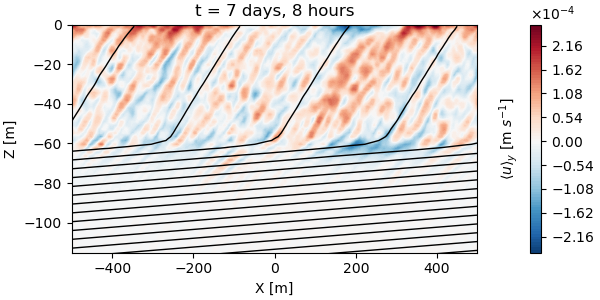

In [25]:
plt.close()
fig = plt.figure(figsize=(6,3), constrained_layout=True)
ax = fig.add_subplot(111)

itime = 166-72
kw0 = {
    # 'vmin': -5e-3,
    # 'vmax': 5e-3,
    'norm': mcolors.CenteredNorm(),
    'levels': 100, #np.linspace(-1e-5, 1e-5, 100),
    'cmap': 'RdBu_r'
}

Cu = ax.contourf(mfd.xF, mfd.zC, mfd.U.isel(time=itime), **kw0)
ax.contour(mfd.xC, mfd.zC, mfd.B.isel(time=itime)+bak.B.isel(yC=0), 
              np.arange(0,1.9,0.08)*1e-4, colors='k', linewidths=1)

cbar = fig.colorbar(Cu, ax=ax, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.2f'))
cbar.set_label(r'$\langle u\rangle_{y}$ [m $s^{-1}$]', labelpad=-70)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
cbar.ax.yaxis.set_offset_position('left')
ax.set_title(f't = {(itime+72)//24} days, {(itime+72)%24} hours')
ax.set_ylim(-115,0)
ax.set_ylabel('Z [m]');
ax.set_xlabel('X [m]');

# plt.savefig('../Figures/'+case+'_UtransectXZ.png', dpi=200)

### Surface map

In [11]:
###patch start###
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new
###patch end###

from spectrum import TWODimensional_spec
# from pyspec.spectrum import TWODimensional_spec
from scipy.ndimage import gaussian_filter

In [94]:
case = 'f11_Q000_W022_D000_St0'#'spinup_no_Vbak'#'spinup'
fpath = '/glade/work/zhihuaz/Data/FrontalZone/'+case+'.nc'
ds = xr.open_dataset(fpath, group='average').load()#.chunk('auto')
ds.close()
top = xr.open_dataset(fpath, group='slice/top').load()#.chunk('auto')
top.close()
z_top_slice = top.zC[0]
south = xr.open_dataset(fpath, group='slice/south').load().sel(zC=slice(None,z_top_slice))#.chunk('auto')
south.close()
y_south_slice = south.yC[0]
east = xr.open_dataset(fpath, group='slice/east').load().sel(zC=slice(None,z_top_slice))#.chunk('auto')
east.close()
x_east_slice = east.xC[0]

In [95]:
us = top.u.where((ds.timeTf>=9) & (ds.timeTf<=10), drop=True).squeeze()
vs = top.v.where((ds.timeTf>=9) & (ds.timeTf<=10), drop=True).squeeze()
ws = top.w.where((ds.timeTf>=9) & (ds.timeTf<=10), drop=True).squeeze()
bs = top.b.where((ds.timeTf>=9) & (ds.timeTf<=10), drop=True).squeeze()

uf = gaussian_filter(us, sigma=60/(1e3/512)/4, axes=(1,2))
vf = gaussian_filter(vs, sigma=60/(1e3/512)/4, axes=(1,2))
wf = gaussian_filter(ws, sigma=60/(1e3/512)/4, axes=(1,2))
bf = gaussian_filter(bs, sigma=60/(1e3/512)/4, axes=(1,2))

In [96]:
spec_u = TWODimensional_spec(us, 1e3/512, 1e3/512)
spec_v = TWODimensional_spec(vs, 1e3/512, 1e3/512)
spec_w = TWODimensional_spec(ws, 1e3/512, 1e3/512)
spec_b = TWODimensional_spec(bs, 1e3/512, 1e3/512)

spec_uf = TWODimensional_spec(uf, 1e3/512, 1e3/512)
spec_vf = TWODimensional_spec(vf, 1e3/512, 1e3/512)
spec_wf = TWODimensional_spec(wf, 1e3/512, 1e3/512)
spec_bf = TWODimensional_spec(bf, 1e3/512, 1e3/512)

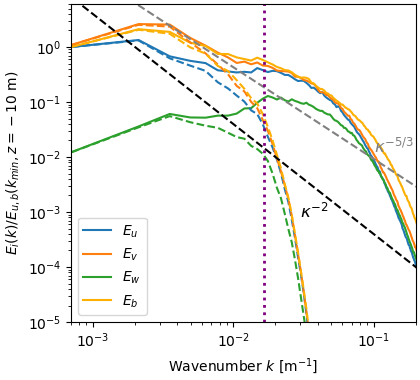

In [97]:
plt.close()
fig = plt.figure(figsize=(4.2,3.8), constrained_layout=True)

k2 = np.array([7e-4,3e-1])
E2 = 1/k2**2/2.5e5
E5o3= 1/k2**(5/3)/5e3#/(8e-4)**(1/3)
plt.loglog(spec_u.ki, spec_u.ispec.mean(axis=-1)/spec_u.ispec[0,:].mean())
plt.loglog(spec_v.ki, spec_v.ispec.mean(axis=-1)/spec_u.ispec[0,:].mean())
plt.loglog(spec_w.ki, spec_w.ispec.mean(axis=-1)/spec_u.ispec[0,:].mean())
plt.loglog(spec_b.ki, spec_b.ispec.mean(axis=-1)/spec_b.ispec[0,:].mean(), c='xkcd:yellow orange')
plt.gca().set_prop_cycle(None)
plt.loglog(spec_uf.ki, spec_uf.ispec.mean(axis=-1)/spec_uf.ispec[0,:].mean(), '--')
plt.loglog(spec_vf.ki, spec_vf.ispec.mean(axis=-1)/spec_uf.ispec[0,:].mean(), '--')
plt.loglog(spec_wf.ki, spec_wf.ispec.mean(axis=-1)/spec_uf.ispec[0,:].mean(), '--')
plt.loglog(spec_bf.ki, spec_bf.ispec.mean(axis=-1)/spec_bf.ispec[0,:].mean(), '--', c='xkcd:yellow orange')

plt.loglog(k2,E2,'k--');
plt.loglog(k2,E5o3,'--',c='gray')
plt.axvline(1/60, ls=':', lw=2, c='purple')
plt.xlim(7e-4,2e-1)
plt.ylim(1e-5,6)
plt.text(3e-2,8e-4, r'$\kappa^{-2}$', fontsize=12)
plt.text(1e-1,1.2e-2, r'$\kappa^{-5/3}$', fontsize=12, color='gray')
plt.legend([r'$E_u$', r'$E_v$', r'$E_w$', r'$E_b$'])
plt.xlabel(r'Wavenumber $k$ [m$^{-1}$]')
plt.ylabel(r'$E_i(k) / E_{u,b}(k_{min}, z=-10$ m)');

# plt.savefig('../Figures/'+case+'_top_uvwb_spec.png', dpi=200)
# plt.savefig('../Figures/'+case+'_top_uvwb_spec_lp.png', dpi=200)

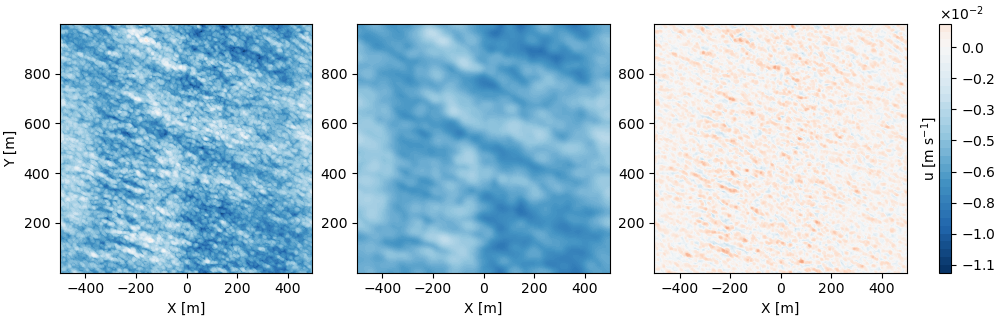

In [98]:
plt.close()
fig = plt.figure(figsize=(10,3.2), constrained_layout=True)
kw = {
    # 'vmin': -5e-3,
    # 'vmax': 5e-3,
    'norm': mcolors.CenteredNorm(),
    'levels': 40,#np.linspace(-2e-3, 2e-3, 41),
    'cmap': 'RdBu_r',
    # 'extend': 'both'
}

ax1 = fig.add_subplot(131)
Ct = ax1.contourf(top.xF, top.yC, us.mean('time'), **kw)

ax2 = fig.add_subplot(132)
ax2.contourf(top.xF, top.yC, uf.mean(axis=0), **kw)

ax3 = fig.add_subplot(133)
ax3.contourf(top.xF, top.yC, us.mean('time')-uf.mean(axis=0), **kw)

cbar = fig.colorbar(Ct, ax=ax3, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.1f'))
cbar.set_label(r'u [m s$^{-1}$]', labelpad=-55)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
# cbar.ax.set_yticks(np.linspace(-5e-3, 5e-3, 6))
cbar.ax.yaxis.set_offset_position('left')

ax1.set_xlabel('X [m]')
ax2.set_xlabel('X [m]')
ax3.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]');
# ax.set_title(f't = {itime}');
# plt.savefig('../Figures/'+case+'_top_u_lp.png', dpi=200);

In [99]:
zetas = top['ζ'].where((ds.timeTf>=9) & (ds.timeTf<=10), drop=True).squeeze()
zetaf = np.gradient(vf, axis=2) - np.gradient(uf, axis=1)

spec_zeta = TWODimensional_spec(zetas, 1e3/512, 1e3/512)
spec_gdbx = TWODimensional_spec(bs.differentiate('xC'), 1e3/512, 1e3/512)
spec_gdby = TWODimensional_spec(bs.differentiate('yC'), 1e3/512, 1e3/512)

spec_zetaf = TWODimensional_spec(zetaf, 1e3/512, 1e3/512)
spec_gdbxf = TWODimensional_spec(np.gradient(bf, axis=2), 1e3/512, 1e3/512)
spec_gdbyf = TWODimensional_spec(np.gradient(bf, axis=1), 1e3/512, 1e3/512)

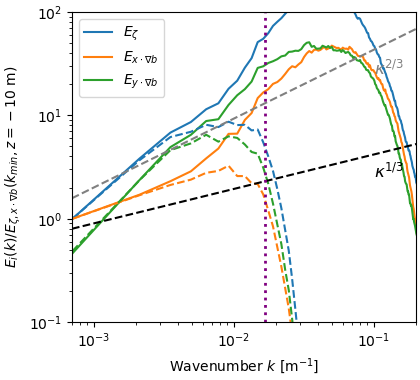

In [100]:
plt.close()
fig = plt.figure(figsize=(4.2,3.8), constrained_layout=True)

E1o3 = k2**(1/3)*9
E2o3 = k2**(2/3)*2e2
plt.loglog(spec_zeta.ki, spec_zeta.ispec.mean(axis=-1)/spec_zeta.ispec[0,:].mean())
plt.loglog(spec_gdbx.ki, spec_gdbx.ispec.mean(axis=-1)/spec_gdbx.ispec[0,:].mean())
plt.loglog(spec_gdby.ki, spec_gdby.ispec.mean(axis=-1)/spec_gdbx.ispec[0,:].mean())
plt.gca().set_prop_cycle(None)
plt.loglog(spec_zetaf.ki, spec_zetaf.ispec.mean(axis=-1)/spec_zetaf.ispec[0,:].mean(), '--')
plt.loglog(spec_gdbxf.ki, spec_gdbxf.ispec.mean(axis=-1)/spec_gdbxf.ispec[0,:].mean(), '--')
plt.loglog(spec_gdbyf.ki, spec_gdbyf.ispec.mean(axis=-1)/spec_gdbxf.ispec[0,:].mean(), '--')
plt.loglog(k2,E1o3,'k--');
plt.loglog(k2,E2o3,'--',c='gray')
plt.axvline(1/60, ls=':', lw=2, c='purple')
plt.xlim(7e-4,2e-1)
plt.ylim(1e-1,1e2)
plt.text(1e-1,2.5, r'$\kappa^{1/3}$', fontsize=12)
plt.text(1e-1,2.5e1, r'$\kappa^{2/3}$', fontsize=12, color='gray')
plt.legend([r'$E_{\zeta}$', r'$E_{x\cdot\nabla b}$', r'$E_{y\cdot\nabla b}$'])
plt.xlabel(r'Wavenumber $k$ [m$^{-1}$]')
plt.ylabel(r'$E_{i}(k) / E_{\zeta, x\cdot\nabla b}(k_{min}, z=-10$ m)');

# plt.savefig('../Figures/'+case+'_top_grads_spec.png', dpi=200);
# plt.savefig('../Figures/'+case+'_top_grads_spec_lp.png', dpi=200);

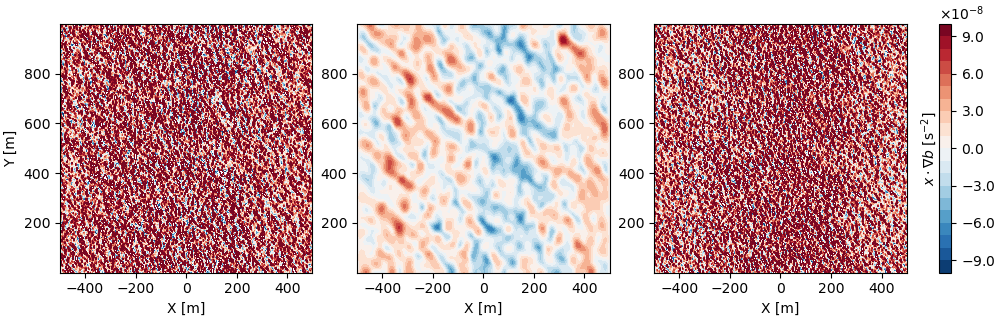

In [101]:
plt.close()
fig = plt.figure(figsize=(10,3.2), constrained_layout=True)
kw = {
    # 'vmin': -5e-3,
    # 'vmax': 5e-3,
    'norm': mcolors.CenteredNorm(),
    'levels': np.linspace(-1e-7, 1e-7, 21),
    'cmap': 'RdBu_r',
    # 'extend': 'both'
}

ax1 = fig.add_subplot(131)
Ct = ax1.contourf(top.xC, top.yC, bs.differentiate('xC').mean('time'), **kw)

ax2 = fig.add_subplot(132)
ax2.contourf(top.xC, top.yC, np.gradient(bf, axis=2).mean(axis=0), **kw)

ax3 = fig.add_subplot(133)
ax3.contourf(top.xC, top.yC, bs.differentiate('xC').mean('time')-np.gradient(bf, axis=2).mean(axis=0), **kw)

cbar = fig.colorbar(Ct, ax=ax3, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.1f'))
cbar.set_label(r'$x\cdot\nabla b$ [s$^{-2}$]', labelpad=-55)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
# cbar.ax.set_yticks(np.linspace(-5e-3, 5e-3, 6))
cbar.ax.yaxis.set_offset_position('left')

ax1.set_xlabel('X [m]')
ax2.set_xlabel('X [m]')
ax3.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]');
# ax.set_title(f't = {itime}');
# plt.savefig('../Figures/'+case+'_top_gdbx_lp.png', dpi=200);

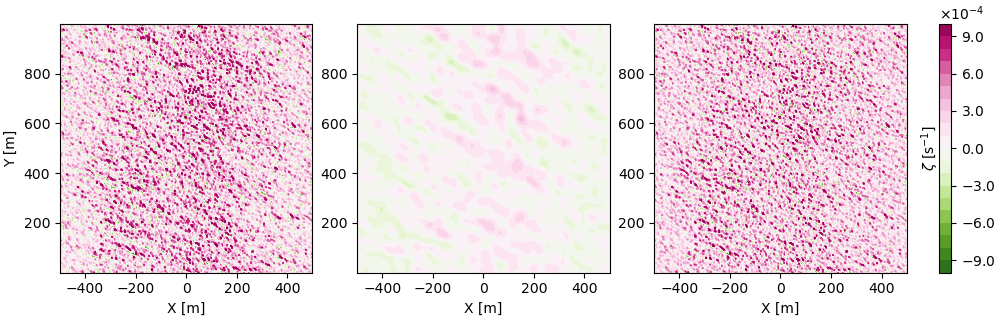

In [102]:
plt.close()
fig = plt.figure(figsize=(10,3.2), constrained_layout=True)
kw = {
    # 'vmin': -5e-3,
    # 'vmax': 5e-3,
    'norm': mcolors.CenteredNorm(),
    'levels': np.linspace(-1e-3, 1e-3, 21),
    'cmap': 'PiYG_r',
    # 'extend': 'both'
}

ax1 = fig.add_subplot(131)
Ct = ax1.contourf(top.xC, top.yC, zetas.mean('time'), **kw)

ax2 = fig.add_subplot(132)
ax2.contourf(top.xC, top.yC, zetaf.mean(axis=0), **kw)

ax3 = fig.add_subplot(133)
ax3.contourf(top.xC, top.yC, zetas.mean('time')-zetaf.mean(axis=0), **kw)

cbar = fig.colorbar(Ct, ax=ax3, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.1f'))
cbar.set_label(r'$\zeta$ [s$^{-1}$]', labelpad=-55)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
# cbar.ax.set_yticks(np.linspace(-5e-3, 5e-3, 6))
cbar.ax.yaxis.set_offset_position('left')

ax1.set_xlabel('X [m]')
ax2.set_xlabel('X [m]')
ax3.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]');
# ax.set_title(f't = {itime}');
# plt.savefig('../Figures/'+case+'_top_zeta_lp.png', dpi=200);

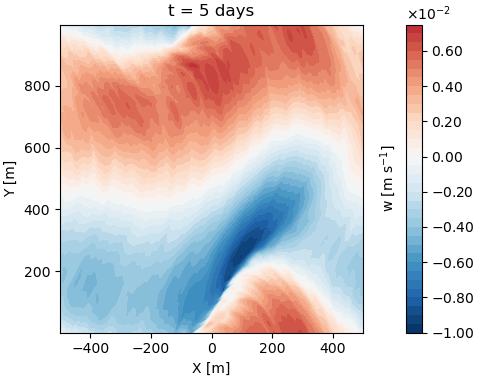

In [16]:
plt.close()
fig = plt.figure(figsize=(4.8,3.8), constrained_layout=True)
ax = fig.add_subplot(111)

itime = '5 days'
xroll = 0

kw = {
    # 'vmin': -5e-3,
    # 'vmax': 5e-3,
    'norm': mcolors.CenteredNorm(),
    'levels': 40, #np.linspace(-5e-3, 5e-3, 22),
    'cmap': 'RdBu_r',
    # 'extend': 'both'
}

Ct = plt.contourf(top.xF, top.yC, top.u.sel(time=itime, method='nearest').squeeze().roll(xF=xroll,yC=0), **kw)
# Ct = plt.contourf(top.xC, top.yF, top.v.sel(time=itime, method='nearest').squeeze().roll(xC=xroll,yF=0), **kw)
# Ct = plt.contourf(top.xC, top.yC, top.w.sel(time=itime, method='nearest').squeeze().roll(xC=xroll,yC=0), **kw)
cbar = fig.colorbar(Ct, ax=ax, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.2f'))
cbar.set_label(r'w [m s$^{-1}$]', labelpad=-70)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
# cbar.ax.set_yticks(np.linspace(-5e-3, 5e-3, 6))
cbar.ax.yaxis.set_offset_position('left')

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title(f't = {itime}');
# plt.savefig('../Figures/wtop_217.png', dpi=200);

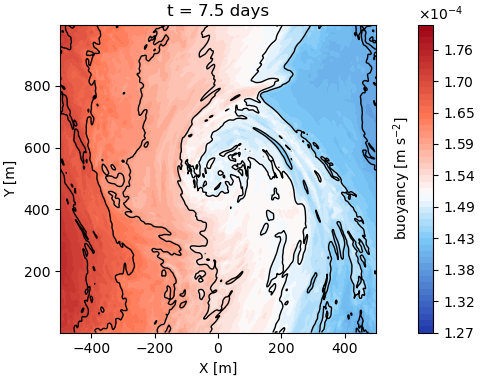

In [6]:
colorlist = ['xkcd:sapphire', 'xkcd:lightblue', 'xkcd:pale grey', 'xkcd:melon', 'xkcd:carmine']
nodes = [0.0, 0.3, 0.45, 0.7, 1.0]
cmap = LinearSegmentedColormap.from_list('buoyancy', list(zip(nodes, colorlist)))

itime = '7.5 days'
xroll = 0

bmin = (ds_top.b.isel(zC=0) + bak.B.isel(zC=-6)).min()
bmax = (ds_top.b.isel(zC=0) + bak.B.isel(zC=-6)).max()
bmin = np.floor(bmin*1e6)/1e6
bmax = np.ceil(bmax*1e6)/1e6
kw = {
    'vmin': bmin,
    'vmax': bmax,
    'levels': np.linspace(bmin, bmax, 50),
    'cmap': cmap#'Spectral_r'
}

plt.close()
fig = plt.figure(figsize=(4.8,3.8), constrained_layout=True)
ax = fig.add_subplot(111)

Ct = ax.contourf(ds_top.xC, ds_top.yC, ds_top.b.sel(time=itime, method='nearest').squeeze().roll(xC=xroll,yC=0) + bak.B.isel(zC=-6), **kw);
ax.contour(ds_top.xC, ds_top.yC, ds_top.b.sel(time=itime, method='nearest').squeeze().roll(xC=xroll,yC=0) + bak.B.isel(zC=-6), linewidths=1, colors='k')
ax.set_title(f't = {itime}')#{itime//24} days, {itime%24} hours')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
cbar = fig.colorbar(Ct, ax=ax, fraction=0.5, pad=0.05, format=FormatScalarFormatter('%.2f'))
cbar.set_label(r'buoyancy [m s$^{-2}$]', labelpad=-60)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
cbar.ax.yaxis.set_offset_position('left')
# plt.savefig('../Figures/btop_217.png', dpi=200)

# def update(frame):
#     global Ct, top, bak, kw, xroll
#     # for each frame, get new data and clear old data stored on each artist
#     top_field = (top.b.isel(time=frame,zC=0).roll(xC=xroll,yC=0)  + bak.B.isel(zC=-1))
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         for coll in Ct.collections:
#             coll.remove()
#     # update the plot
#     Ct = ax.contourf(top.xC, top.yC, top_field, **kw)
#     ax.set_title(f't = {frame//24} days, {frame%24} hours');
#     return Ct

# ani = animation.FuncAnimation(fig=fig, func=update, frames=top.dims['time'], #top.dims['time']
#                               interval=120, repeat_delay=100, blit=True);
# plt.close()
# display(HTML(ani.to_jshtml()));
# ani.save('../Figures/'+case+'_btop.mp4', writer='ffmpeg', fps=5, dpi=150);

### 3D snapshot/movie

#### buoyancy field

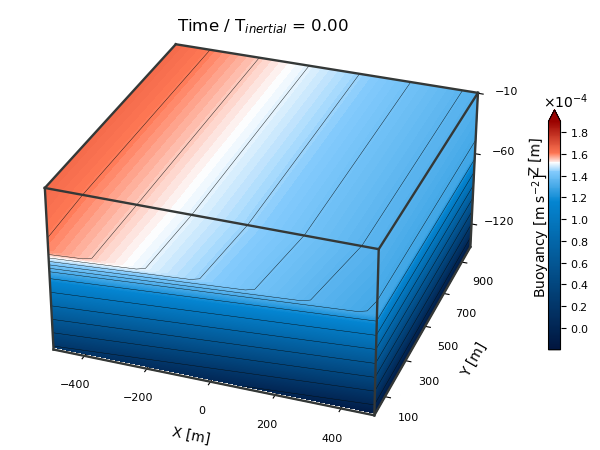

In [130]:
# customized colormap
colorlist = ['xkcd:navy', 'xkcd:cerulean', 'xkcd:sky', 'xkcd:pale grey', 'xkcd:melon', 'xkcd:deep red']
nodes = [0.0, 0.65, 0.78, 0.82, 0.86, 1.0]
cmap = LinearSegmentedColormap.from_list('buoyancy', list(zip(nodes, colorlist)))

# total buoyancy
top['bt']   = (-top.attrs['M²']   * top.xC   + top.b).squeeze().transpose('yC','xC',...)
south['bt'] = (-south.attrs['M²'] * south.xC + south.b).squeeze().transpose('xC','zC',...)
east['bt']  = (-east.attrs['M²']  * east.xC  + east.b).squeeze().transpose('yC','zC',...)

taum = int(case[10:13])/1e3
taud = int(case[15:18])
taux = np.cos(taud/180*np.pi)*taum*np.minimum( np.maximum((ds.timeTf - 5), 0) / 2, 1)
tauy = np.sin(taud/180*np.pi)*taum*np.minimum( np.maximum((ds.timeTf - 5), 0) / 2, 1)

# time interval and initial timestamp in unit of hours
dhr = int(((top.time[2] - top.time[1])/np.timedelta64(1,'h')).data)
hr0 = int((top.time[0]/np.timedelta64(1,'h')).data)

X, Y, Z = np.meshgrid(top.xC, top.yC, east.zC)

# limits and contour values
# bmin = min([top.bt.min(), east.bt.min(), south.bt.min()])
# bmax = max([top.bt.max(), east.bt.max(), south.bt.max()])
bmin = -2e-5#np.floor(bmin*1e5)/1e5
bmax = 1.9e-4#np.ceil(bmax*1e5)/1e5
blines = np.concatenate([np.arange(0,1.4,0.2), np.arange(1.3,2,0.05)])*1e-4
xmin, xmax = -500, 500
# ymin, ymax = 0, 250
ymin, ymax = 0, 1000
zmin, zmax = -140, z_top_slice.data

Ckw = {'vmin': bmin,
       'vmax': bmax,
       'levels': np.linspace(bmin, bmax, 256),
       'extend': 'max',
       'cmap': cmap
      }
Lkw = {'linewidths': 0.3, 
       'colors': 'xkcd:almost black'
      }
edges_kw = {'color': 'xkcd:charcoal', 
            'linewidth': 1.7, 
            'zorder': 2
           }

plt.close()
fig = plt.figure(figsize=(6,4.5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
itime = 0
xroll = 0

Ct = ax.contourf(X[:, :, -1], Y[:, :, -1], top.bt.isel(time=itime).roll(xC=xroll), zdir='z', offset=z_top_slice, **Ckw)
Cs = ax.contourf(X[0, :, :], south.bt.isel(time=itime).roll(xC=xroll), Z[0, :, :], zdir='y', offset=y_south_slice, **Ckw)
# xroll doesn't work for east slice!!
Ce = ax.contourf(east.bt.isel(time=itime), Y[:, -1, :], Z[:, -1, :], zdir='x', offset=x_east_slice, **Ckw)

Lt = ax.contour(X[:, :, -1], Y[:, :, -1], top.bt.isel(time=itime).roll(xC=xroll), blines, zdir='z', offset=z_top_slice, **Lkw)
Ls = ax.contour(X[0, :, :], south.bt.isel(time=itime).roll(xC=xroll), Z[0, :, :], blines, zdir='y', offset=y_south_slice, **Lkw)
Le = ax.contour(east.bt.isel(time=itime), Y[:, -1, :], Z[:, -1, :], blines, zdir='x', offset=x_east_slice, **Lkw)
Aw = ax.quiver(300, 1000, 10, 6e3*taux.isel(time=itime), 6e3*tauy.isel(time=itime), 0, normalize=False, colors='k', 
               arrow_length_ratio=0.2, lw=3, capstyle='round', joinstyle='round')

ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)
ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.set(xlabel='X [m]',
       ylabel='Y [m]',
       zlabel='Z [m]',
       zticks=[-10, -60, -120],
       xticks=[-400, -200, 0, 200, 400],
       yticks=[100, 300, 500, 700, 900],
       # yticks=[50, 100, 150, 200],
       xlim=[xmin, xmax], 
       ylim=[ymin, ymax], 
       zlim=[zmin, zmax])
ax.tick_params(axis='both', labelsize=8)
ax.view_init(30, -70, 0)
# ax.set_box_aspect((1,0.4,0.55), zoom=1.05)
ax.set_box_aspect((1,1,0.55), zoom=1.15)
ax.set_title(rf'Time / T$_{{inertial}}$ = {ds.timeTf[itime]:.2f}', y=0.999);
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)

cbar = fig.colorbar(Ct, ax=ax, fraction=0.025, pad=0.1, ticks=np.arange(0,2,0.2)*1e-4, 
                    format=FormatScalarFormatter('%.1f'))
cbar.set_label(r'Buoyancy [m s$^{-2}$]', labelpad=-42, fontsize=10)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
# cbar.ax.yaxis.set_offset_position('left')
cbar.ax.get_yaxis().get_offset_text().set_visible(False)
exponent_axis = np.floor(np.log10(max(cbar.ax.get_yticks()))).astype(int)
cbar.ax.annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                 xy=(-0.5, 1.06), xycoords='axes fraction')
cbar.ax.tick_params(labelsize=8) 

# axins = inset_axes(ax, width='100%', height='100%',
#                    bbox_to_anchor=(.7, .88, .6, .15),
#                    bbox_transform=ax.transAxes, loc=3)
# axins.plot(ds_windE.timeTf, 0.022*np.minimum((ds_windE.timeTf - 5)/2, 1))
# axins.set_ylim(0,0.025)
# axins.set_xlim(5,12)
# for spine in ['top', 'right']:
#     axins.spines[spine].set_visible(False)
# axins.tick_params(axis='both', labelsize=6)

# def update(frame):
#     global Ct, Cs, Ce, Lt, Ls, Le, Aw
#     # for each frame, get new data and clear old data stored on each artist
#     top_field   = top.bt.isel(time=frame).roll(xC=xroll)
#     south_field = south.bt.isel(time=frame).roll(xC=xroll)
#     east_field  = east.bt.isel(time=frame)
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         for obj in (Ct, Cs, Ce, Lt, Ls, Le):
#             for coll in obj.collections:
#                 coll.remove()
#     Aw.remove()
#     # update the plot
#     Ct = ax.contourf(X[:, :, -1], Y[:, :, -1], top_field,   zdir='z', offset=z_top_slice,   **Ckw)
#     Cs = ax.contourf(X[0, :, :], south_field,  Z[0, :, :],  zdir='y', offset=y_south_slice, **Ckw)
#     Ce = ax.contourf(east_field, Y[:, -1, :],  Z[:, -1, :], zdir='x', offset=x_east_slice,  **Ckw)
#     Lt = ax.contour(X[:, :, -1], Y[:, :, -1], top_field,   blines, zdir='z', offset=z_top_slice,   **Lkw)
#     Ls = ax.contour(X[0, :, :],  south_field, Z[0, :, :],  blines, zdir='y', offset=y_south_slice, **Lkw)
#     Le = ax.contour(east_field,  Y[:, -1, :], Z[:, -1, :], blines, zdir='x', offset=x_east_slice,  **Lkw)
#     Aw = ax.quiver(300, 1000, 10, 6e3*taux.isel(time=frame), 6e3*tauy.isel(time=frame), 0, normalize=False, colors='k', 
#                    arrow_length_ratio=0.2, lw=3, capstyle='round', joinstyle='round')
#     ax.set_title(rf'Time / T$_{{inertial}}$ = {ds_windE.timeTf[frame]:.2f}', y=0.999)
#     return Ct, Cs, Ce, Lt, Ls, Le, Aw

# ani = animation.FuncAnimation(fig=fig, func=update, frames=range(1,5),#top.dims['time'], 
#                               interval=400, repeat_delay=800)# blit=True);#
# plt.close()
# display(HTML(ani.to_jshtml()));
# ani.save('../Figures/'+case+'_bt3d.mp4', writer='ffmpeg', fps=5, dpi=200);

#### vertical vorticity or $Ro$ field

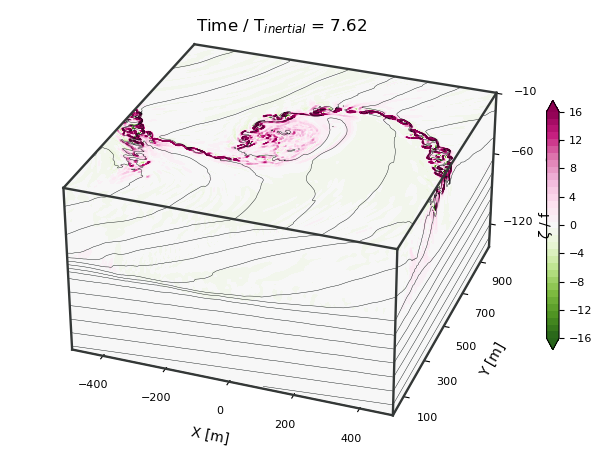

In [137]:
# Ro
top['Ro']   = (top['ζ']   / top.f  ).squeeze().transpose('yF','xF',...)
south['Ro'] = (south['ζ'] / south.f).squeeze().transpose('xF','zC',...)
east['Ro']  = (east['ζ']  / east.f ).squeeze().transpose('yF','zC',...)

Xf, Yf, Zc = np.meshgrid(top.xF, top.yF, east.zC)

# limits and contour values
bmin = min([top['Ro'].min(), east['Ro'].min(), south['Ro'].min()])
bmax = max([top['Ro'].max(), east['Ro'].max(), south['Ro'].max()])
bmin = -16#np.ceil(bmin*1e2)/1e2
bmax = 16#np.floor(bmax*1e2)/1e2
blines = np.concatenate([np.arange(0,1.4,0.2), np.arange(1.3,2,0.05)])*1e-4

Ckw = {'vmin': bmin,
       'vmax': bmax,
       'levels': np.linspace(bmin, bmax, 34),
       'extend': 'both',
       'cmap': 'PiYG_r'
      }
Lkw = {'linewidths': 0.3, 
       'colors': 'xkcd:almost black'
      }
edges_kw = {'color': 'xkcd:charcoal', 
            'linewidth': 1.7, 
            'zorder': 2
           }

plt.close()
fig = plt.figure(figsize=(6,4.5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
itime = 133
xroll = 0

Ct = ax.contourf(Xf[:, :, -1], Yf[:, :, -1], top['Ro'].isel(time=itime).roll(xF=xroll), zdir='z', offset=z_top_slice, **Ckw)
Cs = ax.contourf(Xf[0, :, :], south['Ro'].isel(time=itime).roll(xF=xroll), Zc[0, :, :], zdir='y', offset=y_south_slice, **Ckw)
# xroll doesn't work for east slice!!
Ce = ax.contourf(east['Ro'].isel(time=itime), Yf[:, -1, :], Zc[:, -1, :], zdir='x', offset=x_east_slice, **Ckw)

Lt = ax.contour(X[:, :, -1], Y[:, :, -1], top.bt.isel(time=itime).roll(xC=xroll), blines, zdir='z', offset=z_top_slice, **Lkw)
Ls = ax.contour(X[0, :, :], south.bt.isel(time=itime).roll(xC=xroll), Z[0, :, :], blines, zdir='y', offset=y_south_slice, **Lkw)
Le = ax.contour(east.bt.isel(time=itime), Y[:, -1, :], Z[:, -1, :], blines, zdir='x', offset=x_east_slice, **Lkw)

ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)
ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.set(xlabel='X [m]',
       ylabel='Y [m]',
       zlabel='Z [m]',
       zticks=[-10, -60, -120],
       xticks=[-400, -200, 0, 200, 400],
       yticks=[100, 300, 500, 700, 900],
       xlim=[xmin, xmax], 
       ylim=[ymin, ymax], 
       zlim=[zmin, zmax])
ax.tick_params(axis='both', labelsize=8)
ax.view_init(30, -70, 0)
ax.set_box_aspect((1,1,0.55), zoom=1.15)
ax.set_title(rf'Time / T$_{{inertial}}$ = {ds.timeTf[itime]:.2f}', y=0.999);
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)

cbar = fig.colorbar(Ct, ax=ax, fraction=0.025, pad=0.07, ticks=np.linspace(bmin,bmax,9))
cbar.set_label(r'$\zeta$ / f', labelpad=-40, fontsize=10)
cbar.ax.tick_params(labelsize=8) 

# def update(frame):
#     global Ct, Cs, Ce, Lt, Ls, Le
#     # for each frame, get new data and clear old data stored on each artist
#     top_field   = top.bt.isel(time=frame).roll(xC=xroll)
#     south_field = south.bt.isel(time=frame).roll(xC=xroll)
#     east_field  = east.bt.isel(time=frame)
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore')
#         for obj in (Ct, Cs, Ce, Lt, Ls, Le):
#             for coll in obj.collections:
#                 coll.remove()
#     # update the plot
#     Ct = ax.contourf(X[:, :, -1], Y[:, :, -1], top_field,   zdir='z', offset=z_top_slice,   **Ckw)
#     Cs = ax.contourf(X[0, :, :], south_field,  Z[0, :, :],  zdir='y', offset=y_south_slice, **Ckw)
#     Ce = ax.contourf(east_field, Y[:, -1, :],  Z[:, -1, :], zdir='x', offset=x_east_slice,  **Ckw)
#     Lt = ax.contour(X[:, :, -1], Y[:, :, -1], top_field,   blines, zdir='z', offset=z_top_slice,   **Lkw)
#     Ls = ax.contour(X[0, :, :],  south_field, Z[0, :, :],  blines, zdir='y', offset=y_south_slice, **Lkw)
#     Le = ax.contour(east_field,  Y[:, -1, :], Z[:, -1, :], blines, zdir='x', offset=x_east_slice,  **Lkw)
#     ax.set_title(rf'Time / T$_{{inertial}}$ = {ds.timeTf[frame]:.2f}', y=0.999)
#     return Ct, Cs, Ce, Lt, Ls, Le

# ani = animation.FuncAnimation(fig=fig, func=update, frames=3,#top.dims['time'], 
#                               interval=400, repeat_delay=800)# blit=True);#
# plt.close()
# display(HTML(ani.to_jshtml()));
# ani.save('../Figures/'+case+'_b3d.mp4', writer='ffmpeg', fps=3, dpi=200);

#### vertical velocity field

/glade/scratch/zhihuaz/ipykernel_75864/4213078828.py:102: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  Ce = ax.contourf(east_field, Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw)
/glade/scratch/zhihuaz/ipykernel_75864/4213078828.py:100: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  Ct = ax.contourf(X[:, :, -1], Y[:, :, -1], top_field, zdir='z', offset=0, **kw)
/glade/scratch/zhihuaz/ipykernel_75864/4213078828.py:101: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  Cs = ax.contourf(X[0, :, :], south_field, Z[0, :, :], zdir='y', offset=0, **kw)
/glade/scratch/zhihuaz/ipykernel_75864/4213078828.py:102: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  Ce = ax.contourf(east_field, Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw)


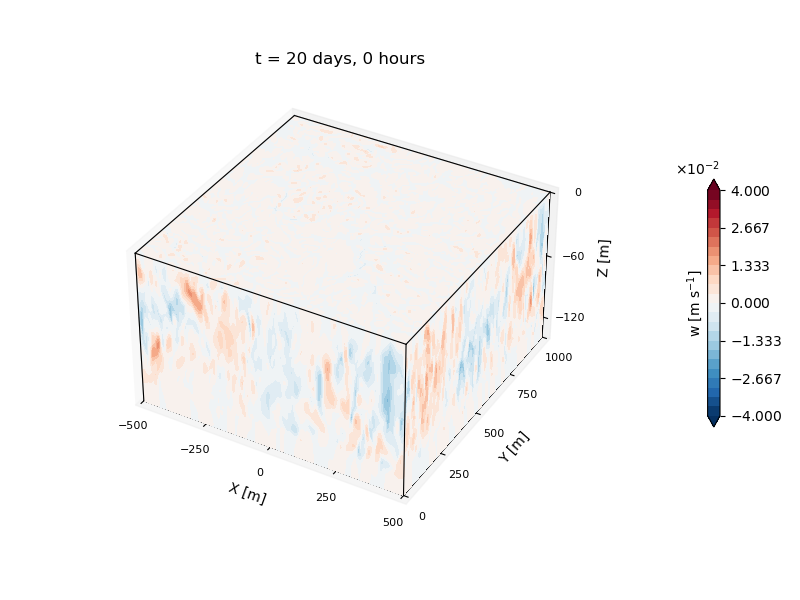

In [42]:
X, Y, Z = np.meshgrid(south.xC, east.yC, east.zF)
itime = 0

wmin = min([top.w.isel(zF=0).min(), 
            east.w.isel(xC=0).min(), 
            south.w.isel(yC=0).min()])
wmax = max([top.w.isel(zF=0).max(), 
            east.w.isel(xC=0).max(), 
            south.w.isel(yC=0).max()])
wamp = np.floor(max([abs(wmin), abs(wmax)])*1e2)/1e2

kw = {
    'vmin': -wamp,
    'vmax': wamp,
    'levels': np.linspace(-wamp, wamp, 25),
    'cmap': 'RdBu_r',
    'extend': 'both'
}

# Create a figure with 3D ax
plt.close()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
Ct = ax.contourf(
    X[:, :, -1], Y[:, :, -1], top.w.isel(time=itime,zF=0).transpose('yC','xC'),
    zdir='z', offset=0, **kw
)
Cs = ax.contourf(
    X[0, :, :], south.w.isel(time=itime,yC=0).transpose('xC','zF'), Z[0, :, :],
    zdir='y', offset=0, **kw
)
Ce = ax.contourf(
    east.w.isel(time=itime,xC=0).transpose('yC','zF'), Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --

# Plot edges
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], [zmax, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [m]',
    ylabel='Y [m]',
    zlabel='Z [m]',
    zticks=[0, -60, -120],
    xticks=[-500, -250, 0, 250, 500],
    yticks=[0, 250, 500, 750, 1000]
)
ax.tick_params(axis='both', labelsize=8)

# Set zoom and angle view
ax.view_init(35, -60, 0)
ax.set_box_aspect((1,1,0.6), zoom=1)

# Colorbar
cbar = fig.colorbar(Ce, ax=ax, fraction=0.02, pad=0.22)
cbar.set_label(r'w [m s$^{-1}$]', labelpad=-70)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
cbar.ax.set_yticks(np.linspace(-wamp, wamp, 7))

# Set limits of the plot from coord limits
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax]);
ax.set_title(f't = {itime//24} days, {itime%24} hours');

# plt.savefig('../Figures/b3d_initial.png', dpi=150)
# plt.savefig('../Figures/b3d_mid.png', dpi=150)


def update(frame):
    global Ct, Cs, Ce, top, south, east, X, Y, Z, kw
    # for each frame, get new data and clear old data stored on each artist
    top_field = top.w.isel(time=frame,zF=0).transpose('yC','xC')
    south_field = south.w.isel(time=frame,yC=0).transpose('xC','zF')
    east_field = east.w.isel(time=frame,xC=0).transpose('yC','zF')
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        for coll in Ct.collections:
            coll.remove()
        for coll in Cs.collections:
            coll.remove()
        for coll in Ce.collections:
            coll.remove()
    # update the plot
    Ct = ax.contourf(X[:, :, -1], Y[:, :, -1], top_field, zdir='z', offset=0, **kw)
    Cs = ax.contourf(X[0, :, :], south_field, Z[0, :, :], zdir='y', offset=0, **kw)
    Ce = ax.contourf(east_field, Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw)
    ax.set_title(f't = {frame//24} days, {frame%24} hours');
    return (Ct, Cs, Ce)

ani = animation.FuncAnimation(fig=fig, func=update, frames=top.dims['time'], interval=120, repeat_delay=100);#
plt.close()
display(HTML(ani.to_jshtml()));
ani.save('../Figures/'+case+'_w3d.mp4', writer='ffmpeg', fps=5, dpi=150);